In [93]:
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import random

random.seed(1000)

path = '/Users/qiwenmok/Downloads'
file_name = 'champions_group_data.csv'
fp = f'{path}/champions_group_data.csv'

df = pd.read_csv(f'{path}/{file_name}')

print('Path to dataset files:', path)

Path to dataset files: /Users/qiwenmok/Downloads


In [94]:
df = pd.read_csv(fp, sep=',', engine='python', encoding='utf-8-sig')
print(df.shape)
df.head()

(8559, 72)


,DUNS Number,Company Sites,Website,Address Line 1,City,State,State Or Province Abbreviation,Postal Code,Country,Phone Number,...,ISIC Rev 4 Code,ISIC Rev 4 Description,IT Budget,IT spend,No. of PC,No. of Desktops,No. of Laptops,No. of Routers,No. of Servers,No. of Storage Devices
0,639677726,"Zyf Lopsking Material Technology Co., Ltd. No....",NaN,"No.2777 Taidong Road, Panyang Industrial Park,...",Suzhou,Jiangsu,JS,215000.0,CHINA,NaN,...,4662.0,Wholesale of metals and metal ores,0,0,1 to 10,1 to 10,1 to 10,1 to 10,NaN,NaN
1,547756179,"Beijing Kaishi Lide Commerce And Trade Co., Lt...",NaN,"No.306, Building 8, Shuangyushudongli Jia, Hai...",Beijing,Beijing,BJ,100086.0,CHINA,1.082129e+09,...,NaN,NaN,5601,3472,1 to 10,1 to 10,1 to 10,1 to 10,1 to 10,1 to 10
2,728834216,Keshan Shengren Potato Industry Processing Co....,NaN,"South of Siduan Road, Xi Street, Keshan Town, ...",Qiqihar,Heilongjiang,HL,161000.0,CHINA,NaN,...,NaN,NaN,86905,53881,11 to 50,1 to 10,1 to 10,1 to 10,1 to 10,1 to 10
3,728791839,Zuoquan County Yuanfeng Agriculture Technology...,NaN,"Songaoliang Village, Liaoyang Town, Zuoquan Co...",Jinzhong,Shanxi,SX,30600.0,CHINA,NaN,...,NaN,NaN,11630,7210,NaN,NaN,NaN,NaN,NaN,NaN
4,728889244,Zuoquan County Tianxin Real Estate Development...,NaN,"No.14, Chengyadao Alley, Zuoquan County ...",Jinzhong,Shanxi,SX,30600.0,CHINA,3.548653e+09,...,NaN,NaN,94564,58629,1 to 10,1 to 10,1 to 10,1 to 10,1 to 10,1 to 10


In [95]:
if 'has_website' not in df.columns:
    w = df['Website'].astype(str).str.strip()
    w = w.replace(['', 'nan', 'NaN', 'None', 'NULL', 'null'], np.nan)
    df['has_website'] = w.notna().astype(int)

In [96]:
hardware_cols = ['No. of PC', 'No. of Desktops', 'No. of Laptops', 'No. of Servers', 'No. of Routers', 'No. of Storage Devices']
[c for c in hardware_cols if c in df.columns]

['No. of PC',
 'No. of Desktops',
 'No. of Laptops',
 'No. of Servers',
 'No. of Routers',
 'No. of Storage Devices']

In [97]:
def range_to_midpoint(x):
    if pd.isna(x):
        return np.nan

    s = str(x).strip().lower()
    if s =='' or s in ['nan','none','null']:
        return np.nan

    m = re.match(r'^(\d+)\s*to\s*(\d+)$',s)
    if m:
        a,b = float(m.group(1)), float(m.group(2))
        return (a+b)/2

    m2 = re.match(r'^(\d+)\s*\+$',s)
    if m2:
        return float(m2.group(1))

    try:
        return float(s)
    except:
        return np.nan
                                

In [98]:
df['pc_mid'] = df['No. of PC'].apply(range_to_midpoint)
df[['No. of PC', 'pc_mid']].head(10)

,No. of PC,pc_mid
0,1 to 10,5.5
1,1 to 10,5.5
2,11 to 50,30.5
3,NaN,NaN
4,1 to 10,5.5
5,1 to 10,5.5
6,11 to 50,30.5
7,1 to 10,5.5
8,11 to 50,30.5
9,1 to 10,5.5


In [99]:
mid_cols = []
has_cols = []
log_cols = []

for col in hardware_cols:
    mid = col + '_mid'
    has = col +'_has'
    log = col + '_log'
    
    df[mid] = df[col].apply(range_to_midpoint)
    df[has] = df[mid].notna().astype(int)
    df[log] = np.log1p(df[mid])
    
    mid_cols.append(mid)
    has_cols.append(has)
    log_cols.append(log)

print('mid_cols:', mid_cols)
print('has_cols:', has_cols)
print('log_cols:', log_cols)

display(df[mid_cols].describe())

mid_cols: ['No. of PC_mid', 'No. of Desktops_mid', 'No. of Laptops_mid', 'No. of Servers_mid', 'No. of Routers_mid', 'No. of Storage Devices_mid']
has_cols: ['No. of PC_has', 'No. of Desktops_has', 'No. of Laptops_has', 'No. of Servers_has', 'No. of Routers_has', 'No. of Storage Devices_has']
log_cols: ['No. of PC_log', 'No. of Desktops_log', 'No. of Laptops_log', 'No. of Servers_log', 'No. of Routers_log', 'No. of Storage Devices_log']


,No. of PC_mid,No. of Desktops_mid,No. of Laptops_mid,No. of Servers_mid,No. of Routers_mid,No. of Storage Devices_mid
count,8278.000000,8218.000000,7920.000000,5210.000000,5260.000000,5126.000000
mean,16.196424,6.067656,5.924242,5.781190,7.834601,9.069060
std,41.325098,12.362309,11.364616,11.093185,17.160479,28.977633
min,5.500000,5.500000,5.500000,5.500000,5.500000,5.500000
25%,5.500000,5.500000,5.500000,5.500000,5.500000,5.500000
50%,5.500000,5.500000,5.500000,5.500000,5.500000,5.500000
75%,5.500000,5.500000,5.500000,5.500000,5.500000,5.500000
max,750.500000,350.500000,350.500000,750.500000,300.500000,750.500000


In [100]:
df['it_breadth'] = df[has_cols].sum(axis=1)
df['it_intensity'] = df[log_cols].fillna(0).sum(axis=1)
display(df[['has_website', 'it_breadth', 'it_intensity']].describe())

,has_website,it_breadth,it_intensity
count,8559.000000,8559.000000,8559.000000
mean,0.073023,4.674845,9.251156
std,0.260189,1.519604,3.321590
min,0.000000,0.000000,0.000000
25%,0.000000,3.000000,5.615407
50%,0.000000,5.000000,10.937196
75%,0.000000,6.000000,11.230813
max,1.000000,6.000000,37.299403


## Methodology

Firm-level IT operational complexity was analysed using observable digital infrastructure indicators constructed directly from the raw firm-level dataset (8,559 firms). Hardware-related variables, including the number of PCs, desktops, laptops, servers, routers, and storage devices, were originally reported in categorical ranges. These ranges were converted into numeric midpoints to approximate underlying infrastructure scale. To account for skewness and comparability across device types, log-transformed values were used when constructing intensity measures, while binary indicators captured the presence of each infrastructure category.

Two core dimensions of IT capability were derived. IT breadth was defined as the count of distinct infrastructure categories present within a firm, capturing the diversity of its IT setup. IT intensity was defined as the sum of log-transformed infrastructure quantities, reflecting the overall scale and depth of IT deployment. In addition, a binary indicator for website presence was included as a proxy for basic digital adoption.

All features were standardised prior to clustering to ensure equal weighting. K-means clustering was applied to the standardised feature set to group firms based on similarities in IT breadth, IT intensity, and digital presence. The optimal number of clusters was selected using the elbow method, which indicated diminishing reductions in within-cluster inertia beyond four clusters. Consequently, K = 4 was chosen to balance interpretability and explanatory power.

Cluster characteristics were examined using summary statistics and visual diagnostics, including a scatter plot of IT breadth versus IT intensity to assess separation, and tabulated cluster profiles to facilitate interpretation of structural differences across groups.


In [101]:
features = ['has_website', 'it_breadth', 'it_intensity']
missing = [c for c in features if c not in df.columns]
if missing:
    raise KeyError(f'These feature columns are missing in df: {missing}.')

X = df[features].copy().fillna(0)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

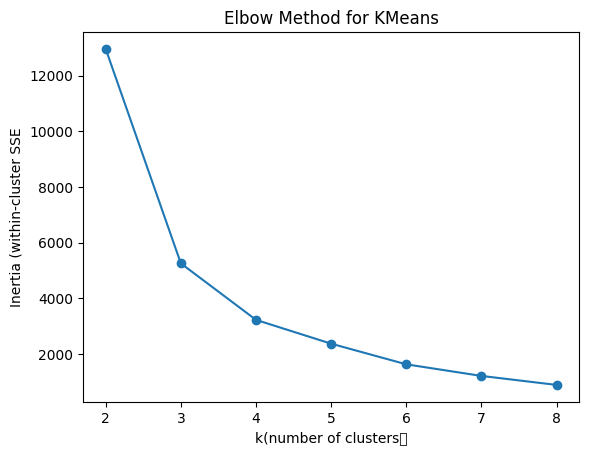

In [102]:
inertias = []
K_range = range(2,9)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.figure()
plt.plot(list(K_range), inertias, marker='o')
plt.xlabel('k(number of clusters）')
plt.ylabel('Inertia (within-cluster SSE')
plt.title('Elbow Method for KMeans')
plt.show()

### Cluster Selection

The elbow plot shows a sharp reduction in within-cluster inertia up to four clusters, after which additional clusters yield diminishing marginal improvements. Based on this pattern, four clusters were selected to capture meaningful heterogeneity in IT adoption while maintaining interpretability.


In [103]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_scaled)
df['cluster'].value_counts().sort_index()

cluster
0    4910
1    2748
2     620
3     281
Name: count, dtype: int64

In [104]:
cluster_profile = (df.groupby('cluster')[features].agg(['mean', 'median']))
cluster_profile[('n', 'size')] =df.groupby('cluster').size()
display(cluster_profile)

has_website        it_breadth        it_intensity                n
               mean median       mean median         mean     median  size
cluster                                                                   
0          0.000000    0.0   5.715275    6.0    11.431789  11.230813  4910
1          0.000000    0.0   3.277656    3.0     6.154985   5.615407  2748
2          1.000000    1.0   4.740323    5.0     9.883217  11.230813   620
3          0.017794    0.0   0.014235    0.0     0.032261   0.000000   281

### Cluster Characteristics

The four clusters exhibit clear and systematic differences in IT adoption patterns. One cluster is characterised by high IT breadth and high IT intensity, reflecting firms with extensive and diversified infrastructure footprints. Another cluster displays moderate breadth but lower overall intensity, suggesting more selective or constrained deployment of IT resources. A third cluster shows strong digital presence alongside moderate infrastructure levels, indicating outward-facing digital adoption without exceptionally large internal IT footprints. The smallest cluster consists of firms with minimal IT breadth and near-zero intensity, representing very limited IT adoption.


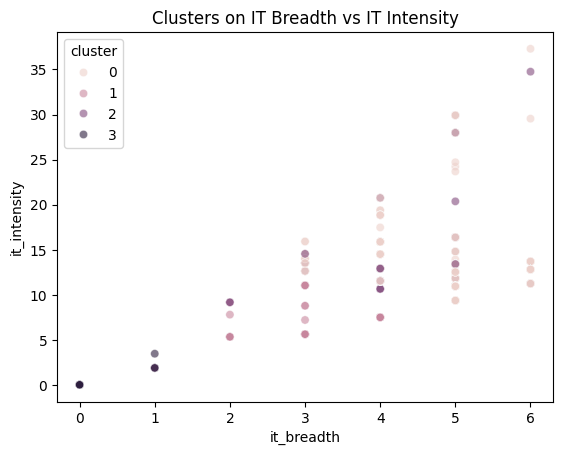

In [105]:
plt.figure()
sns.scatterplot(data=df, x='it_breadth', y='it_intensity', hue='cluster', alpha=0.6)
plt.title('Clusters on IT Breadth vs IT Intensity')
plt.show()

IT Breadth vs IT Intensity scatter plot

The scatter plot of IT breadth against IT intensity shows a clear positive relationship between the diversity of infrastructure and its overall scale. Firms with a larger number of infrastructure categories tend to exhibit higher intensity values, reflecting cumulative investment across multiple device types. The clustering structure aligns closely with this pattern: high-complexity clusters occupy the upper-right region of the plot, while low-complexity firms concentrate near the origin.

Although some overlap exists between clusters at intermediate levels of breadth and intensity, the overall separation suggests that the clustering captures meaningful and systematic differences rather than random variation. The presence of distinct low-intensity and high-intensity regimes supports the interpretation that IT complexity increases progressively rather than in discrete jumps.

In [106]:
for col in ['Industry', 'Country', 'City']:
    if col in df.columns:
        print(f'n\Top{col} by cluster:')
        display(df.groupby('cluster')[col].value_counts().groupby(level=0).head(5))
        

n\TopCountry by cluster:


cluster  Country             
0        CHINA                   4902
         INDONESIA                  8
1        CHINA                   2747
         INDONESIA                  1
2        CHINA                    618
         INDONESIA                  2
3        CHINA                    278
         China                      3
Name: count, dtype: int64

n\TopCity by cluster:


cluster  City                          
0        Kunming                           339
         Hangzhou                          263
         Zhengzhou                         180
         Beijing                           172
         Xi'an                             139
1        Kunming                           254
         Yuxi                               95
         Urumqi                             80
         Qujing                             73
         Xi'an                              72
2        Kunming                            76
         Beijing                            33
         Xi'an                              27
         Hangzhou                           25
         Zhuhai                             24
3        Yuxi                               25
         Kunming                            11
         Shaoyang                           11
         Urumqi                              9
         Yantai                              9
Name: count, dtype: 

Overall interpretation

Taken together, the results demonstrate that IT operational complexity is a multidimensional construct shaped by both the breadth and intensity of infrastructure deployment. Firms with similar sizes or locations can exhibit markedly different IT profiles, highlighting that scale alone does not fully determine digital complexity. The clustering approach therefore provides a meaningful classification of firms based on observable IT characteristics, offering a structured way to compare operational complexity across heterogeneous firms.